## Cleveland Heart Disease Prediction Analysis

### Data Set Information:

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"


Attribute Information:

Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

1. Age: Patients Age in years (Numeric)
2. Sex: Gender (Male : 1; Female : 0) (Nominal)
3. cp: Type of chest pain experienced by patient. This term categorized into 4 category. 0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)
4. trestbps: patient's level of blood pressure at resting mode in mm/HG (Numerical)
5. chol: Serum cholesterol in mg/dl (Numeric)
6. fbs: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
7. restecg: Result of electrocardiogram while at rest are represented in 3 distinct values. 
    0 : Normal 
    1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV). 
    2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)
8. thalach: Maximum heart rate achieved (Numeric)
9. exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
10. oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)
11. slope: ST segment measured in terms of slope during peak exercise 
    0: up sloping; 
    1: flat; 
    2: down sloping(Nominal)
12. ca: The number of major vessels (0–3)(nominal)
13. thal: A blood disorder called thalassemia
    0: NULL 
    1: normal blood flow 
    2: fixed defect (no blood flow in some part of the heart)       3: reversible defect (a blood flow is observed but it is not normal(nominal)
14. target: It is the target variable which we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.

### Work Flow
Data Collection ---> Data Preprocessing ---> Data Analysis ---> Model Preparation ---> Model Evaluation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Data Collection

In [2]:
# load the dataset
heart_disease = pd.read_csv('Cleveland_heart_disease_data.csv')
print(heart_disease.shape)
heart_disease.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


On loading the dataset, we notice that the dataset consist of 303 rows and 14 columns.

### Data Preprocessing

In [3]:
# Get some info on the dataset
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Our dataset contains float and integer datatypes. There are 13 interger based columns and 1 float based column.

In [4]:
# Check for missing values
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values in our datasets, thus we can make a good analysis on our data.

### Data Analysis

##### performing statistical analysis

In [5]:
# get some statistical info
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# check the distribution of target variable
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> Defective Heart   
0 --> Healthy Heart

In [7]:
# calculate teh correlation matrix
correlation_matrix = heart_disease.corr()

# set the threshold for correlation
correlation_threshold = 0.5

In [8]:
# Find highly correlated features
highly_correlated_features = correlation_matrix[((correlation_matrix > correlation_threshold) | (correlation_matrix < -correlation_threshold)) & (correlation_matrix != 1)]
highly_correlated_features = highly_correlated_features.unstack().dropna().reset_index()

# Print the highly correlated features
print("Highly Correlated Features:")
for index, row in highly_correlated_features.iterrows():
    feature1 = row['level_0']
    feature2 = row['level_1']
    correlation = row[0]
    print(f"{feature1} - {feature2}: {correlation:.2f}")

Highly Correlated Features:
oldpeak - slope: -0.58
slope - oldpeak: -0.58


We find that 'age' and 'oldpeak' are negatively correlated. 

In [9]:
# find highly correlated features with diagnosis
highly_correlated_features = np.abs(correlation_matrix['target']).sort_values(ascending=False)
highly_correlated_features= highly_correlated_features[highly_correlated_features > correlation_threshold]

# print the highly correlated features
print("Highly Correlated Features with Diagnosis: ")
for feature, correlation in highly_correlated_features.iteritems():
    print(f"{feature}: {correlation:.2f}")

Highly Correlated Features with Diagnosis: 
target: 1.00


There are no features that highly correlate with the diagnosis test.

##### performing data visualizations

In [10]:
# set the background for the incoming graphs
sns.set()

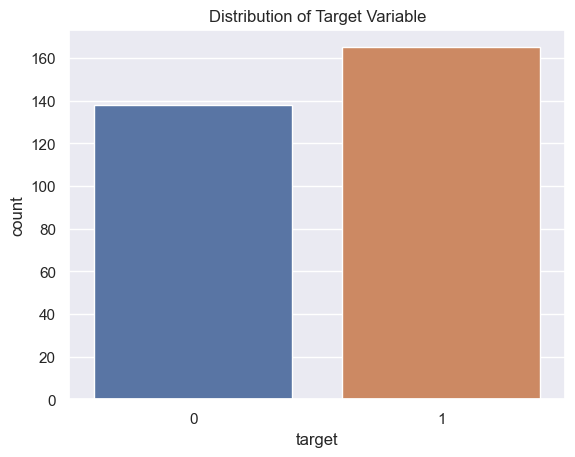

In [11]:
# visualize the target variable distribution
sns.countplot(x='target', data=heart_disease)
plt.title('Distribution of Target Variable')
plt.show()

We infer from the graph above what we already noticed. Those with heart disease in our dataset are more than those without.

Text(0, 0.5, 'Count')

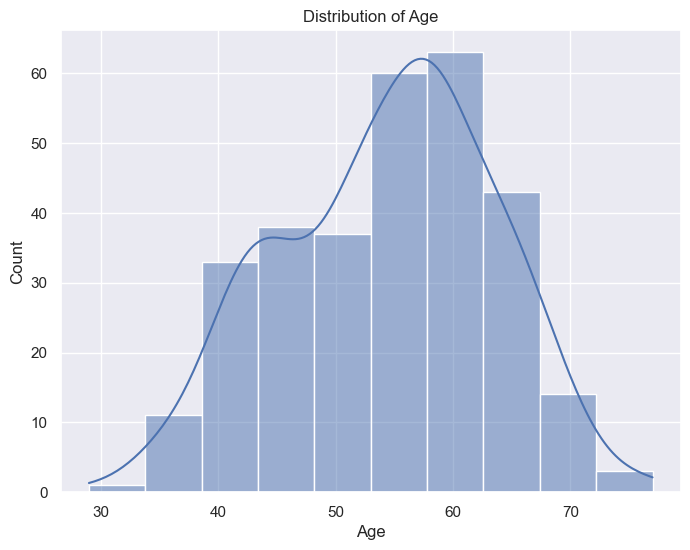

In [12]:
# visualize the distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(heart_disease['age'], bins=10, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")

Our dataset has mor middle-aged people than the youth.

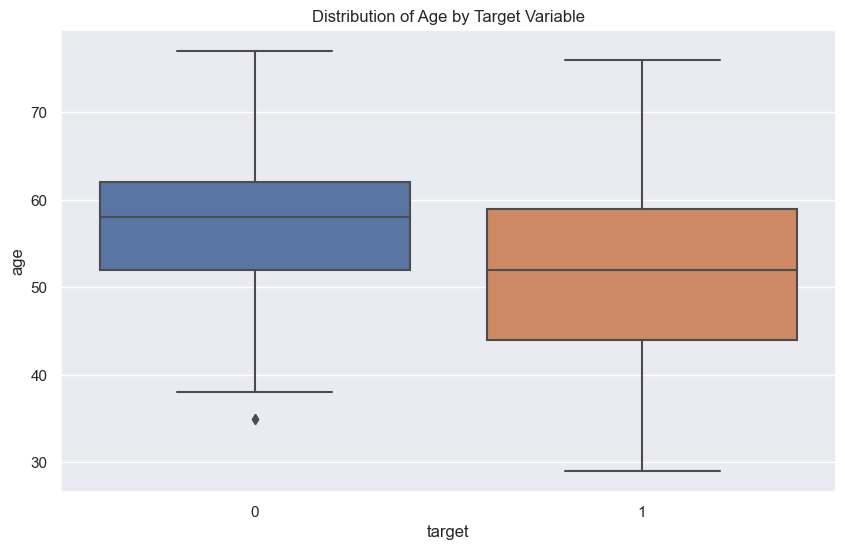

In [13]:
# visualize the distribution of age by target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=heart_disease)
plt.title("Distribution of Age by Target Variable")
plt.show()

From the graph above, on the average, those with a healthy heart are the ages of 50 and 60. The healthy heart chart is negatively skew and we notice it has an outlier, implying the distribution is wide. For the defective health, we notice a normal distribution. We can infer that irrespective of the age, anyone can have a heart disease.

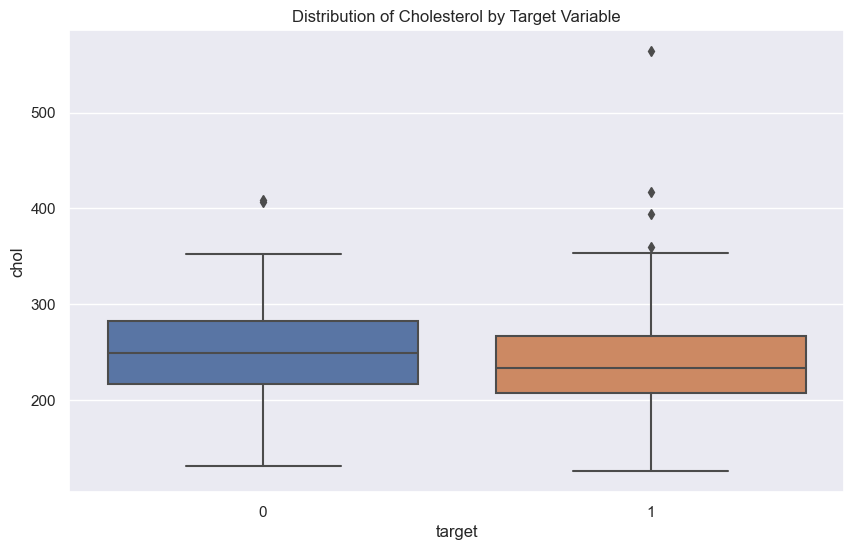

In [14]:
# visualize the distribution of cholesterol levels by target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=heart_disease)
plt.title("Distribution of Cholesterol by Target Variable")
plt.show()

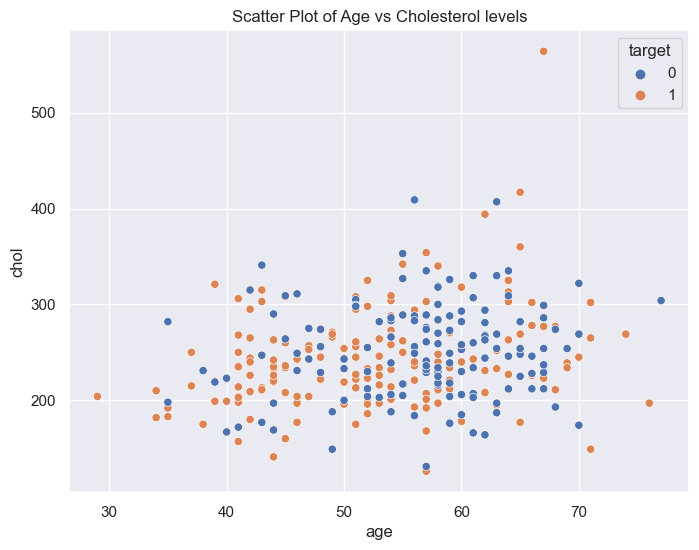

In [15]:
# visualize the scatter plot of age and choloesterol levels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='chol', hue='target', data=heart_disease)
plt.title("Scatter Plot of Age vs Cholesterol levels")
plt.show()

Not much can be inferred but if we group the points into 3 or 4 points per group, we notice that, between the ages of 30 and 50, there's is a high chance the person has a cholesterol level between 200 and 300 while people whithin the ages of 55 to 70 have cholesterol levels ranging from 50 to 350.

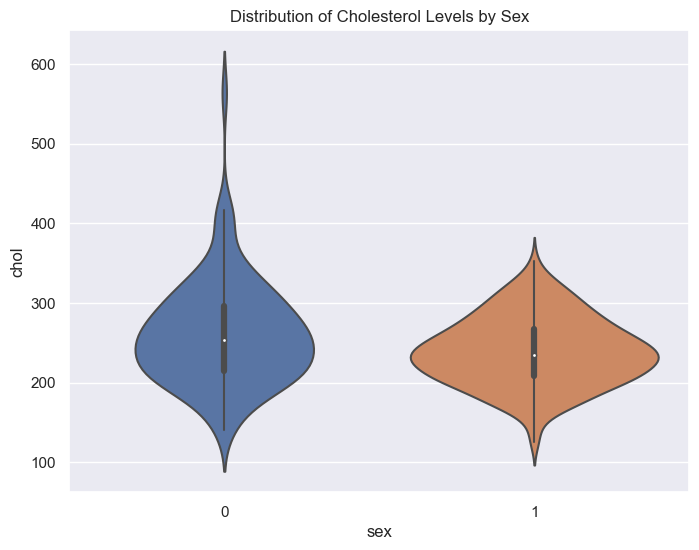

In [16]:
# plot the distribution of cholesterol levels (chol) by sex
plt.figure(figsize=(8, 6))
sns.violinplot(x='sex', y='chol', data=heart_disease)
plt.title('Distribution of Cholesterol Levels by Sex')
plt.show()

Males --> 1  
Females --> 0  
Looking at the thickness of the violin plots, a lot of females have their cholesterol levels between 200 and 300. Same for the males, with the plot having a tail. This implies that the cholesterol level of some males increase with time.

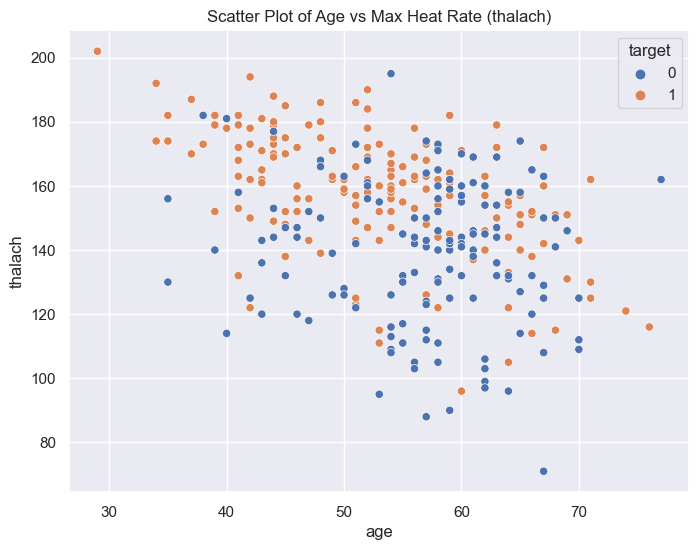

In [17]:
# plot age and maximum heart rate (thalach) with hue as the target variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=heart_disease)
plt.title("Scatter Plot of Age vs Max Heat Rate (thalach)")
plt.show()

The datapoints in this scatter point regresses. We notice that heart rates above 140 have defective hearts and surprisingly are between the ages of 30 and 50.

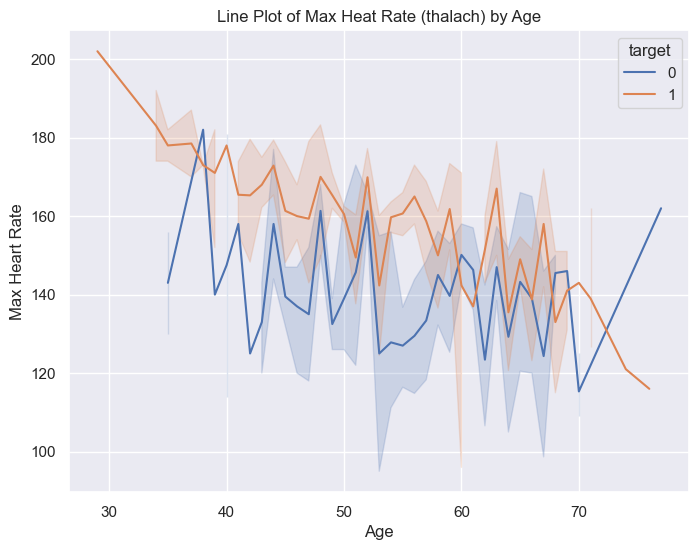

In [18]:
# plot a line plot maximum heart rate (thalach) with hue as the target variable
plt.figure(figsize=(8, 6))
sns.lineplot(x='age', y='thalach', hue='target', data=heart_disease)
plt.title("Line Plot of Max Heat Rate (thalach) by Age")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.show()

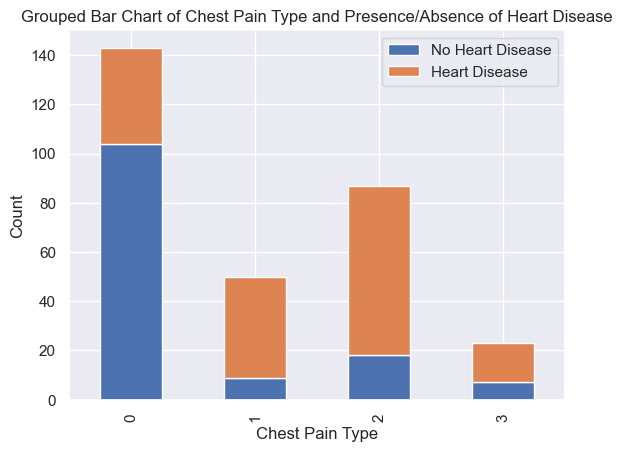

In [19]:
# plot a grouped bar chart of chest pain type (cp) and presence/absence of heart disease
cp_target_counts = heart_disease.groupby(['cp', 'target']).size().unstack()
cp_target_counts.plot(kind='bar', stacked=True)
plt.title("Grouped Bar Chart of Chest Pain Type and Presence/Absence of Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.show()

The graph above indicates that type 0 which is typical angina chest pain is common followed by non-anginal chest pain. And though more typical angina chest pain patients have a defective heart, comparing its ratio to the other types, we can infer that having either type 1 (atypical anginal), type 2 (non-anginal) and type 3 (asymptomatic) can mean having a defective heart since the heart disease to no heart disease ratio is very high.

<Figure size 1000x600 with 0 Axes>

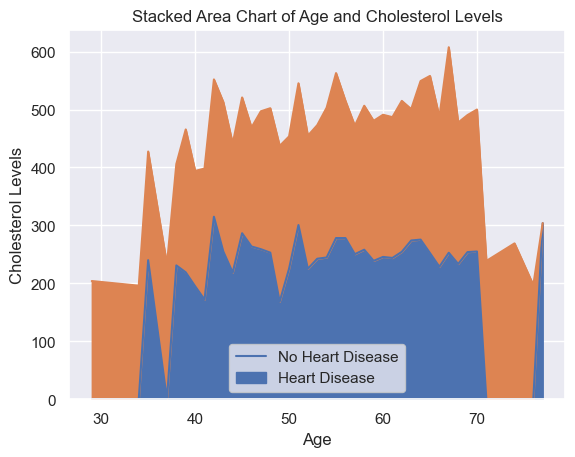

In [20]:
# plot a stacked area chart of age and cholesterol levels (chol) with hue as the target variable
plt.figure(figsize=(10, 6))
heart_disease_stacked = heart_disease.groupby(['age', 'target'])['chol'].mean().unstack().reset_index()
heart_disease_stacked.plot(x='age', kind='area', stacked=True)
plt.title('Stacked Area Chart of Age and Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Cholesterol Levels')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

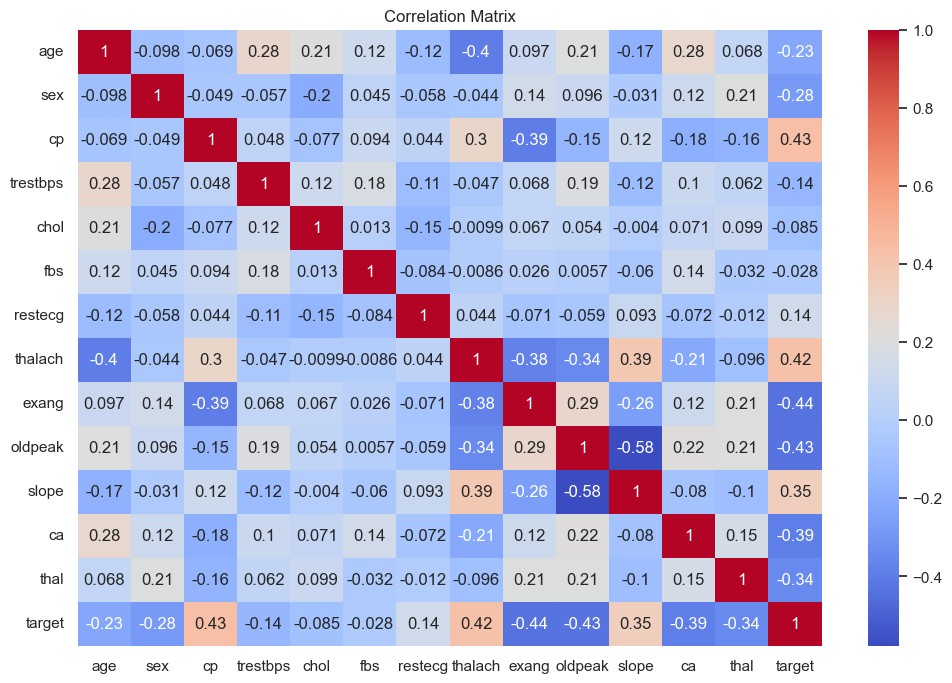

In [21]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Text(0, 0.5, 'Correlation')

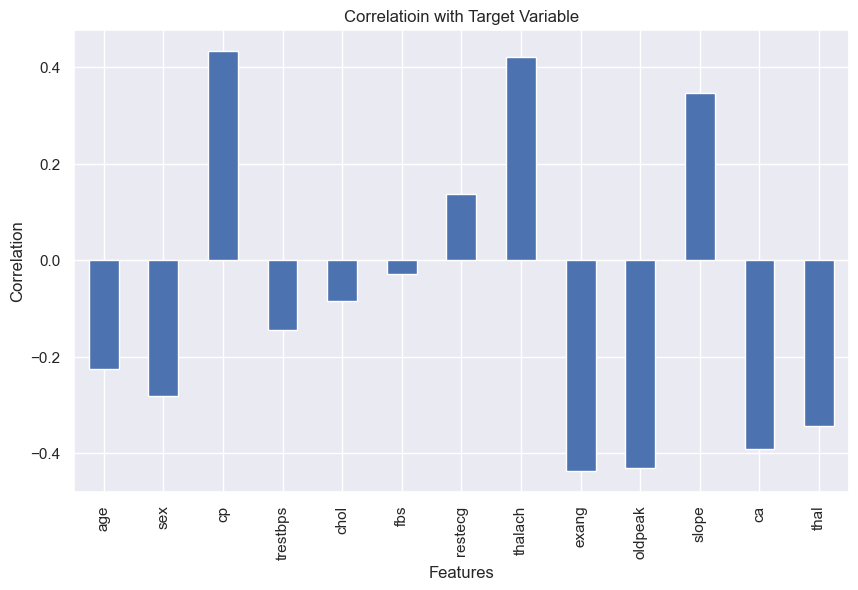

In [22]:
# visualize the correlation matrix with target variable
corr_with_target = correlation_matrix['target'].drop('target')
corr_with_target.plot(kind='bar', figsize=(10, 6))
plt.title("Correlatioin with Target Variable")
plt.xlabel("Features")
plt.ylabel("Correlation")

###### perform another data preprocess before prediction analysis

In [23]:
# making a copy for an experiment
cleveland_heart_disease = heart_disease

In [24]:
# normalize numeric features in the cleveland_heart_disease (example: Min-Max scaling)
cleveland_heart_disease['age'] = (cleveland_heart_disease['age'] - cleveland_heart_disease['age'].min()) / (cleveland_heart_disease['age'].max() - cleveland_heart_disease['age'].min())
cleveland_heart_disease['trestbps'] = (cleveland_heart_disease['trestbps'] - cleveland_heart_disease['trestbps'].min()) / (cleveland_heart_disease['trestbps'].max() - cleveland_heart_disease['trestbps'].min())
cleveland_heart_disease['chol'] = (cleveland_heart_disease['chol'] - cleveland_heart_disease['chol'].min()) / (cleveland_heart_disease['chol'].max() - cleveland_heart_disease['chol'].min())
cleveland_heart_disease['thalach'] = (cleveland_heart_disease['thalach'] - cleveland_heart_disease['thalach'].min()) / (cleveland_heart_disease['thalach'].max() - cleveland_heart_disease['thalach'].min())
cleveland_heart_disease['oldpeak'] = (cleveland_heart_disease['oldpeak'] - cleveland_heart_disease['oldpeak'].min()) / (cleveland_heart_disease['oldpeak'].max() - cleveland_heart_disease['oldpeak'].min())

### Model Preparation

In [25]:
# load libraries needed for machine learning
import optuna
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
# feature engineering
heart_disease['age_squaredd'] = heart_disease['age'] ** 2
heart_disease['chol_log'] = heart_disease['chol'].apply(lambda x: 0 if x == 0 else np.log(x + 1))

In [27]:
# split the dataset into features and targe
X = cleveland_heart_disease.drop('target', axis=1)
y = cleveland_heart_disease['target']

In [28]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###### Using support vector machines

In [29]:
# Hyperparameter tuning

# Define the objective function for hyperparameter tuning
def objective(trial):
    C = trial.suggest_loguniform("C", 1e-3, 1e3)
    gamma = trial.suggest_loguniform("gamma", 1e-3, 1e3)

    model = SVC(C=C, gamma=gamma, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return -accuracy_score(y_test, y_pred)  # maximize accuracy

# Perform hyperparameter tuning using Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best accuracy achieved
print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", -study.best_value)

[I 2023-05-24 17:09:12,255] A new study created in memory with name: no-name-4b051d1c-dce5-4cee-aad5-56d7b68e54d6
[I 2023-05-24 17:09:12,930] Trial 0 finished with value: -0.5245901639344263 and parameters: {'C': 0.09310803616419974, 'gamma': 0.0010512360897074662}. Best is trial 0 with value: -0.5245901639344263.
[I 2023-05-24 17:09:12,996] Trial 1 finished with value: -0.5245901639344263 and parameters: {'C': 0.028325586978428616, 'gamma': 0.0034689256572952246}. Best is trial 0 with value: -0.5245901639344263.
[I 2023-05-24 17:09:13,006] Trial 2 finished with value: -0.7377049180327869 and parameters: {'C': 12.092866070024009, 'gamma': 4.2052274743507025}. Best is trial 2 with value: -0.7377049180327869.
[I 2023-05-24 17:09:13,016] Trial 3 finished with value: -0.8688524590163934 and parameters: {'C': 326.04092020500536, 'gamma': 0.0019804271509481722}. Best is trial 3 with value: -0.8688524590163934.
[I 2023-05-24 17:09:13,026] Trial 4 finished with value: -0.5245901639344263 and p

[I 2023-05-24 17:09:14,174] Trial 38 finished with value: -0.8524590163934426 and parameters: {'C': 26.89873611947842, 'gamma': 0.001841763333117846}. Best is trial 3 with value: -0.8688524590163934.
[I 2023-05-24 17:09:14,191] Trial 39 finished with value: -0.5245901639344263 and parameters: {'C': 0.033451133584114036, 'gamma': 0.013838268914851687}. Best is trial 3 with value: -0.8688524590163934.
[I 2023-05-24 17:09:14,207] Trial 40 finished with value: -0.8688524590163934 and parameters: {'C': 9.063848826563918, 'gamma': 0.006783285751392131}. Best is trial 3 with value: -0.8688524590163934.
[I 2023-05-24 17:09:14,228] Trial 41 finished with value: -0.8688524590163934 and parameters: {'C': 2.867784039743638, 'gamma': 0.005320826465340664}. Best is trial 3 with value: -0.8688524590163934.
[I 2023-05-24 17:09:14,238] Trial 42 finished with value: -0.8688524590163934 and parameters: {'C': 5.140282965733009, 'gamma': 0.001969811339300374}. Best is trial 3 with value: -0.868852459016393

[I 2023-05-24 17:09:14,892] Trial 77 finished with value: -0.8688524590163934 and parameters: {'C': 0.5383313567837635, 'gamma': 0.23649187768660815}. Best is trial 56 with value: -0.9016393442622951.
[I 2023-05-24 17:09:14,911] Trial 78 finished with value: -0.8688524590163934 and parameters: {'C': 2.3761176638441888, 'gamma': 0.6744035119945883}. Best is trial 56 with value: -0.9016393442622951.
[I 2023-05-24 17:09:14,924] Trial 79 finished with value: -0.8688524590163934 and parameters: {'C': 3.936487308920882, 'gamma': 0.5484481969695636}. Best is trial 56 with value: -0.9016393442622951.
[I 2023-05-24 17:09:14,954] Trial 80 finished with value: -0.8524590163934426 and parameters: {'C': 1.815346351757572, 'gamma': 0.958798316012351}. Best is trial 56 with value: -0.9016393442622951.
[I 2023-05-24 17:09:14,972] Trial 81 finished with value: -0.8852459016393442 and parameters: {'C': 1.0762206344153078, 'gamma': 0.3020759386191857}. Best is trial 56 with value: -0.9016393442622951.
[I

Best Hyperparameters: {'C': 0.7427215957152554, 'gamma': 0.623041086870683}
Best Accuracy: 0.9016393442622951


In [30]:
# Train the support vector machine model with the best hyperparameters
best_model = SVC(
    C=study.best_params["C"],
    gamma=study.best_params["gamma"],
    random_state=42
)
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

### Model Evaluation

In [34]:
# checking the accuracy of our model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

Accuracy: 90.1639344262295


After so many trials, the accuracy of our model is quite good. Thus it is a very good predictive system.

###### Using Decision Trees

In [35]:
# Hyperparameter tuning

# Define the objective function for hyperparameter tuning
def objective(trial):
    max_depth = trial.suggest_int("max_depth", 3, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return -accuracy_score(y_test, y_pred)  # maximize accuracy

# Perform hyperparameter tuning using Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best accuracy achieved
print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", -study.best_value)

[I 2023-05-24 17:09:16,338] A new study created in memory with name: no-name-681069a8-44aa-4627-b23b-aaecdcb3f697
[I 2023-05-24 17:09:16,702] Trial 0 finished with value: -0.819672131147541 and parameters: {'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 0 with value: -0.819672131147541.
[I 2023-05-24 17:09:16,722] Trial 1 finished with value: -0.8360655737704918 and parameters: {'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 1 with value: -0.8360655737704918.
[I 2023-05-24 17:09:16,728] Trial 2 finished with value: -0.7868852459016393 and parameters: {'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 1 with value: -0.8360655737704918.
[I 2023-05-24 17:09:16,740] Trial 3 finished with value: -0.8032786885245902 and parameters: {'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 1 with value: -0.8360655737704918.
[I 2023-05-24 17:09:16,746] Trial 4 finished with value: -0.

[I 2023-05-24 17:09:17,444] Trial 37 finished with value: -0.7868852459016393 and parameters: {'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 24 with value: -0.8852459016393442.
[I 2023-05-24 17:09:17,472] Trial 38 finished with value: -0.8852459016393442 and parameters: {'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 7}. Best is trial 24 with value: -0.8852459016393442.
[I 2023-05-24 17:09:17,493] Trial 39 finished with value: -0.819672131147541 and parameters: {'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 24 with value: -0.8852459016393442.
[I 2023-05-24 17:09:17,513] Trial 40 finished with value: -0.7704918032786885 and parameters: {'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 8}. Best is trial 24 with value: -0.8852459016393442.
[I 2023-05-24 17:09:17,530] Trial 41 finished with value: -0.8852459016393442 and parameters: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 7}. Be

[I 2023-05-24 17:09:18,283] Trial 74 finished with value: -0.8852459016393442 and parameters: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 7}. Best is trial 24 with value: -0.8852459016393442.
[I 2023-05-24 17:09:18,304] Trial 75 finished with value: -0.7868852459016393 and parameters: {'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 24 with value: -0.8852459016393442.
[I 2023-05-24 17:09:18,326] Trial 76 finished with value: -0.8852459016393442 and parameters: {'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 7}. Best is trial 24 with value: -0.8852459016393442.
[I 2023-05-24 17:09:18,346] Trial 77 finished with value: -0.7868852459016393 and parameters: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 24 with value: -0.8852459016393442.
[I 2023-05-24 17:09:18,372] Trial 78 finished with value: -0.8524590163934426 and parameters: {'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 9}.

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 7}
Best Accuracy: 0.8852459016393442


In [36]:
# Train the decision tree model with the best hyperparameters
best_model = DecisionTreeClassifier(
    max_depth=study.best_params["max_depth"],
    min_samples_split=study.best_params["min_samples_split"],
    min_samples_leaf=study.best_params["min_samples_leaf"],
    random_state=42
)
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

### Model Evaluation

In [40]:
# checking the accuracy of our model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

Accuracy: 88.52459016393442
